## 利用維基百科查詢企業資訊

In [33]:
import requests
res = requests.get('https://zh.wikipedia.org/zh-tw/Google')

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [35]:
#soup.select_one('.infobox')
#soup.select_one('.vcard')
vcard = soup.select_one('.infobox.vcard')

## W3School Table
- https://www.w3schools.com/html/html_tables.asp

In [36]:
a = 1

if a > 3:
    print('GO')


In [37]:
#a = None
#a= False
#a = []
#a = {}
if a:
    print('GO')

GO


In [38]:
#a = True
#a = 9
#a = [1]
#a = {1}
if a:
    print('GO')

GO


In [39]:
company_info = {}
for tr in vcard.select('tr'):
    if tr.select_one('th') and tr.select_one('td'):
        #print(tr.select_one('th').text.strip(), tr.select_one('td').text.strip())
        #print('========================')
        header = tr.select_one('th').text.strip()
        data   = tr.select_one('td').text.strip()
        company_info[header]  = data

In [40]:
import pandas
companydf = pandas.DataFrame([company_info])
companydf

,代表人物,公司類型,創辦人,員工人數,業務範圍,標語口號,母公司,營業額,產品,產業,稅前盈餘,稅後盈餘,網站,總資產,總部,資產淨值
0,桑德爾·皮蔡（CEO）,子公司,賴利·佩吉、謝爾蓋·布林,"80,110（2017年Q4，Alphabet Inc.員工總數）[2]",世界,Don't be evil.（不作惡）,Alphabet Inc.,▲US$858.07億（2016年）[1],參見Google產品列表,網際網路、軟體、通訊裝置,▲US$224.93億（2016年）[1],▲US$190.68億（2016年）[1],www.google.com,"▲US$1,304.26億（2014年）[1]",美國加利福尼亞州山景城Googleplex,"▲US$1,038.60億（2014年）[1]"


In [56]:
def getCompanyInfo(company):
    companyurl = 'https://zh.wikipedia.org/zh-tw/{}'
    res = requests.get(companyurl.format(company))
    soup = BeautifulSoup(res.text, 'lxml')
    vcard = soup.select_one('.infobox')
    company_info = {}
    for tr in vcard.select('tr'):
        if tr.select_one('th') and tr.select_one('td'):
            #print(tr.select_one('th').text.strip(), tr.select_one('td').text.strip())
            #print('========================')
            header = tr.select_one('th').text.strip()
            dataary = []
            for line in tr.select_one('td').prettify().split('<br/>'):
                soup2 = BeautifulSoup(line, 'lxml')
                dataary.append(' '.join(soup2.text.strip().split()))
            data   = ','.join(dataary)
            company_info[header]  = data
    return company_info

In [57]:
getCompanyInfo('中國信託商業銀行')

{'SWIFT識別碼': 'CTCBTWTP',
 '主要股東': '中國信託金融控股股份有限公司 （100.00%）',
 '代表人': '董事長： 童兆勤,總經理： 陳佳文',
 '實收資本額': '新台幣 1,406.9 億元 (2017)',
 '年營業額': '新台幣 936.8 億元 (2017)',
 '簡稱': '中國信託、中信銀行、中信商銀、CTBC、CTCB、CTB、中信銀、中信',
 '網站': '中國信託商業銀行 （繁體中文）',
 '總部地址': '中華民國,臺北市 南港區 經貿二路 168號（中國信託金融園區）',
 '股票代號': '臺證所 ： 2891',
 '郵遞區號': '115-68',
 '金融代號': '822',
 '開設日期': '1966年（民國55年）3月14日(52年267天）'}

In [58]:
getCompanyInfo('富邦金控')

{'主要子公司': '富邦產物保險,富邦人壽保險,台北富邦銀行,富邦綜合證券,富邦金控創業投資,富邦行銷,富邦資產管理,富邦銀行（香港）,運彩科技股份有限公司',
 '主要股東': '臺北市政府 （13.11%）,明東實業 （8.45%）,道盈實業 （7.73%）,蔡明興 （3.20%）,紅福投資 （2.57%）,蔡明忠 (2.04%)',
 '代表人物': '董事長 ： 蔡明興,總經理 ： 韓蔚廷',
 '公司類型': '金融控股公司 、 上市公司',
 '商業名稱': '富邦金控、富邦金',
 '實收資本額': '新台幣 108,336,039,950元（2015年）',
 '成立': '2001年12月19日（16年357天）',
 '標語口號': '誠信、親切、專業、創新',
 '母公司': '富邦集團',
 '每股盈利': '6.21（2015年）',
 '每股資產淨值': '35.92（2015年）',
 '營業額': '▼ 新台幣4061.45億元 （2017年）',
 '產品': '金融服務、保險',
 '產業': '金融業',
 '稅前盈餘': '▲ 新台幣580.51億元 （2017年）',
 '統一編號': '03374805',
 '網站': 'www.fubon.com',
 '總資產': '▲ 新台幣6兆9195億元 （2017年）',
 '總部': '中華民國 （ 臺灣 ）,臺北市 大安區 建國南路一段 237號',
 '股票代號': '臺證所 ： 2881,LSE ： FBND',
 '資產淨值': '新台幣 376,077百萬元（2015年）'}

In [59]:
getCompanyInfo('台積電')

{'主要子公司': '30家 [2]',
 '主要股東': '花旗託管台積電存託憑證專戶（20.68%）,中華民國 行政院國家發展基金管理會 （6.38%）,花旗台新加坡（2.64%）',
 '代表人物': '董事長 ： 劉德音,總裁 ： 魏哲家',
 '公司類型': '上市公司',
 '創辦人': '張忠謀 （榮譽董事長）',
 '實收資本額': '新臺幣 259,303,804,580元',
 '成立': '1987年2月21日 ( 1987-02-21 )',
 '營業額': '▲ 新臺幣 9774.47億元（2017年） [1]',
 '產品': '晶圓代工 服務',
 '產業': '電子工業',
 '稅後盈餘': '▲ 新臺幣 3431億元（2017年）',
 '統一編號': '22099131',
 '網站': 'www .tsmc .com',
 '總部': '中華民國,新竹市 東區 力行六路8號',
 '股票代號': '臺證所 ： 2330,（1994年9月5日上市）,NYSE ： TSM'}

## 金融公司分類
- https://zh.wikipedia.org/wiki/Category:%E8%87%BA%E7%81%A3%E7%9A%84%E9%87%91%E8%9E%8D%E6%8E%A7%E8%82%A1%E5%85%AC%E5%8F%B8

In [60]:
import pandas
company_list = pandas.read_clipboard(header = None)

In [63]:
company_list[0].tolist()

['第一金融控股',
 '富邦金融控股',
 '國泰金融控股',
 '國票金融控股',
 '華南金融控股',
 '日盛金融控股',
 '台新金融控股',
 '臺灣金融控股',
 '新光金融控股',
 '元大金融控股',
 '永豐金融控股',
 '玉山金融控股',
 '中華開發金融控股',
 '兆豐金融控股',
 '中國信託金融控股',
 '合作金庫金融控股']

In [64]:
company_list = ['第一金融控股',
 '富邦金融控股',
 '國泰金融控股',
 '國票金融控股',
 '華南金融控股',
 '日盛金融控股',
 '台新金融控股',
 '臺灣金融控股',
 '新光金融控股',
 '元大金融控股',
 '永豐金融控股',
 '玉山金融控股',
 '中華開發金融控股',
 '兆豐金融控股',
 '中國信託金融控股',
 '合作金庫金融控股']

In [68]:
company_profiles = []
for company in company_list: 
    profile = getCompanyInfo(company)
    profile['公司名稱'] = company
    company_profiles.append(profile)

In [69]:
company_df = pandas.DataFrame(company_profiles)

In [71]:
company_df.to_excel('financial_company.xlsx')

## 利用Google 查詢公司子公司

In [102]:
import requests
googleurl = 'https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&ei=wSETXMKBBtL6kwXd8bm4BQ&q={0}+{1}&oq={0}+{1}&gs_l=psy-ab.3..0i30.1996.3600..4138...0.0..0.127.853.6j3......0....1..gws-wiz.......0.JbpCn4-ONug'
res = requests.get(googleurl.format('國泰世華', '子公司'))

In [103]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [104]:
#res.text

In [105]:
company_ary = []
for company in soup.select('#ires span'):
    if 'st' in company.get('class'):
        break
    if company.text.strip('，') != '': 
        company_ary.append(company.text.strip('，'))

In [106]:
company_ary

['世越銀行',
 'Cathay United Bank (Cambodia) Corporation Limited',
 'Cathay United Bank (China) Ltd',
 'Seaward Leasing, Ltd.',
 'Cathay Life Insurance Agent Co., Ltd.',
 'Cathay United Bank Co. Ltd.']

In [107]:
import requests
googleurl = 'https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&ei=wSETXMKBBtL6kwXd8bm4BQ&q={0}+{1}&oq={0}+{1}&gs_l=psy-ab.3..0i30.1996.3600..4138...0.0..0.127.853.6j3......0....1..gws-wiz.......0.JbpCn4-ONug'

def getSubCompany(keyword):
    res = requests.get(googleurl.format(keyword, '子公司'))
    soup = BeautifulSoup(res.text, 'lxml')
    company_ary = []
    for company in soup.select('#ires span'):
        if 'st' in company.get('class'):
            break
        if company.text.strip('，') != '': 
            company_ary.append(company.text.strip('，'))
    return company_ary

In [109]:
getSubCompany('台積電')

['SSMC',
 'WaferTech',
 'QUALCOMM Panel Manufacturing Ltd.',
 'TSMC North America, Inc.',
 'TSMC Global Ltd.',
 'TSMC (Nanjing) Co. Ltd',
 'Tsmc Korea Limited',
 'TSMC Guang Neng Investment, Ltd.',
 'TSMC China Company Limited',
 'Tsmc Europe B.v.',
 'Tsmc Japan Limited',
 'VisEra Holding Company',
 'Tsmc Technology, Inc.',
 'Tsmc Design Technology Canada Inc.',
 'TSMC Solar Europe B.V.',
 'Tsmc Solar North America, Inc']

## 中英譯名查詢

In [112]:
import requests
headers = {
 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'   
}
res = requests.get('https://www.post.gov.tw/post/internet/Templates/creat_checkImage3.jsp?rand=0.95517516&vKey=81354b99-91ae-45cf-9137-21c109d30de6', headers = headers)

In [113]:
with open('captcha.jpg', 'wb') as f:
    f.write(res.content)

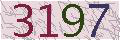

In [114]:
from PIL import Image
Image.open('captcha.jpg')

In [115]:
! pip install pytesseract

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
import pytesseract
print(pytesseract.image_to_string(Image.open('captcha.jpg')))

3197


In [118]:
payload = {
'do_s_1':'1',
'vKey':'fee348a7-0956-4e0b-ad87-46fccc837b5c',
'showMode':'1',
'city':'臺北市',
'change_city':'2',
'cityarea':'中山區',
'street':'南京東路２段',
'lane':'',
'alley':'',
'num':'137',
'num_hyphen':'',
'fl':'14',
'hyphen':'',
'suite':'',
'list':'true',
'checkImange':'8553',
'submit':'查詢',  
}
res2 = requests.post('https://www.post.gov.tw/post/internet/Postal/index.jsp?ID=207', data = payload, headers = headers)

In [123]:
payload = {
'do_s_1':'1',
'vKey':'fee348a7-0956-4e0b-ad87-46fccc837b5c',
'showMode':'1',
'city':'臺北市',
'change_city':'2',
'cityarea':'中山區',
'street':'玉門街',
'lane':'',
'alley':'',
'num':'1',
'num_hyphen':'',
'fl':'',
'hyphen':'',
'suite':'',
'list':'true',
'checkImange':'8553',
'submit':'查詢',  
}
res2 = requests.post('https://www.post.gov.tw/post/internet/Postal/index.jsp?ID=207', data = payload, headers = headers)

In [124]:
from bs4 import BeautifulSoup
soup2 = BeautifulSoup(res2.text, 'lxml')

In [125]:
soup2.select_one('#tb1 td').text

'No.1, Yumen St., Zhongshan Dist., Taipei City 104, Taiwan (R.O.C.)'

## 經濟部─公司及分公司基本資料查詢

In [185]:
import requests
headers = {
 'Cookie': 'JSESSIONID=451C9443D663EAAD2DE8CC85C025EB16',
 'Referer': 'https://serv.gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do;jsessionid=451C9443D663EAAD2DE8CC85C025EB16'   
}
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg', headers = headers)
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

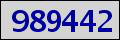

In [186]:
from PIL import Image
Image.open('kaptcha.jpg')

In [187]:
?pytesseract.image_to_string

In [2]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'./tesseract'
print(pytesseract.image_to_string(Image.open('kaptcha.jpg'), \
                        boxes = False,
                        config='--psm 12 --oem 3 -c tessedit_char_whitelist=0123456789'))

TesseractError: (1, 'Error opening data file /Users/travis/build/RabbitLabs/tesseract/tesseract/share/tessdata/eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to the parent directory of your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')